In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indic-tts-deepfake-challenge/sample.csv


In [2]:
!kaggle datasets download -d iveeaten3223times/multilingual-indian-speech-data --unzip

Dataset URL: https://www.kaggle.com/datasets/iveeaten3223times/multilingual-indian-speech-data
License(s): Attribution 4.0 International (CC BY 4.0)
100%|██████████████████████████████████████▉| 5.17G/5.18G [00:45<00:00, 133MB/s]
100%|███████████████████████████████████████| 5.18G/5.18G [00:45<00:00, 122MB/s]


In [3]:
os.makedirs("/kaggle/working/spectrograms", exist_ok=True)

In [4]:
train = pd.read_csv("/kaggle/working/metadata/train.csv")
test = pd.read_csv("/kaggle/working/metadata/test.csv")


In [5]:
train.head(10)

,text,id,language,is_tts,audio_path
0,বিত্তীয় সময়সীমা মানি চলাত বাৰে বাৰে বিফল হোৱ...,ASM_F_ANGER_00342,Assamese,1,audio/Assamese/ASM_F_ANGER_00342.wav
1,মোৰ প্ৰতি আপোনাৰ শেহতীয়া আচৰণ মানি ল'ব নোৱাৰি...,ASM_F_ANGER_00077,Assamese,0,audio/Assamese/ASM_F_ANGER_00077.wav
2,মই বিৰক্ত হৈছো কিয়নো আপুনি এজন নতুন ক্লায়েণ্...,ASM_F_ANGER_00216,Assamese,0,audio/Assamese/ASM_F_ANGER_00216.wav
3,সদায় বলটোৰ ওপৰত চকু ৰাখিবা! ক'ৰ্টত নচা বন্ধ কৰ...,ASM_F_ANGER_00069,Assamese,1,audio/Assamese/ASM_F_ANGER_00069.wav
4,মই সঁচাকৈয়ে হতাশ হৈ পৰো যেতিয়া আমি তিনিমহীয়...,ASM_F_ANGER_00445,Assamese,0,audio/Assamese/ASM_F_ANGER_00445.wav
5,মই মোৰ নতুন ঘৰটোৰ বাবে ইলেক্ট্ৰিকেল দোকানখনৰ প...,ASM_F_ANGER_00235,Assamese,0,audio/Assamese/ASM_F_ANGER_00235.wav
6,আপোনালোকে মই ষ্টক বজাৰৰ বিষয়ে ভালকৈ নাজানো বুল...,ASM_F_ANGER_00199,Assamese,1,audio/Assamese/ASM_F_ANGER_00199.wav
7,"হেই, তোমাৰ মনত নাই নেকি মই কি ৰং বিচাৰিছিলোঁ? ...",ASM_F_ANGER_00056,Assamese,0,audio/Assamese/ASM_F_ANGER_00056.wav
8,আজিকালি সকলো বিক্ৰেতাই তেওঁলোকৰ সামগ্ৰীৰ বিষয়...,ASM_F_ANGER_00160,Assamese,0,audio/Assamese/ASM_F_ANGER_00160.wav
9,আপুনি বাৰু ভাবে নেকি যে মই এজন মূৰ্খ আৰু ফোনবো...,ASM_F_ANGER_00194,Assamese,0,audio/Assamese/ASM_F_ANGER_00194.wav


In [6]:
test.head(10)

,text,id,language,is_tts,audio_path
0,মই যিমান পাৰো চেষ্টা কৰি আছোঁ আৰু আপোনাৰ পদ্ধত...,ASM_F_ANGER_00109,Assamese,-1,audio/Assamese/ASM_F_ANGER_00109.wav
1,শুনকচোন ছাৰ! মই ইয়াত দহ মিনিট ধৰি বাট চাই আছো...,ASM_F_ANGER_00127,Assamese,-1,audio/Assamese/ASM_F_ANGER_00127.wav
2,মই আপোনালোকৰ পৰা বহুত লেপটপ কিনোঁ। মই এয়া অন্...,ASM_F_ANGER_00386,Assamese,-1,audio/Assamese/ASM_F_ANGER_00386.wav
3,আমি আপোনাৰ বৰ্তমানৰ উপাৰ্জনৰ স্থিতি গ্ৰহণযোগ্য...,ASM_F_ANGER_00103,Assamese,-1,audio/Assamese/ASM_F_ANGER_00103.wav
4,সি ইমান বেছি চিঞৰ বাখৰ কৰিছিল যে মই দিনটোত কৰি...,ASM_F_ANGER_00434,Assamese,-1,audio/Assamese/ASM_F_ANGER_00434.wav
5,যেতিয়া মোৰ পত্নীয়ে আমাৰ ল'ৰাটোক বচাবলৈ তাৰফা...,ASM_F_ANGER_00309,Assamese,-1,audio/Assamese/ASM_F_ANGER_00309.wav
6,যেতিয়া মই গাড়ীৰ ৰেজিষ্ট্রেশ্যনৰ বাবে আৱেদন ক...,ASM_F_ANGER_00324,Assamese,-1,audio/Assamese/ASM_F_ANGER_00324.wav
7,মোৰ মাৰ মোৰ ওপৰত বহুত খং উঠিছিল কাৰণ মই ভুলতে ...,ASM_F_ANGER_00367,Assamese,-1,audio/Assamese/ASM_F_ANGER_00367.wav
8,"স্পটিফাইলৈ যোৱা, অনুগ্রহ কৰি পাঞ্জাৱী পপ বিচাৰা",ASM_F_ALEXA_00324,Assamese,-1,audio/Assamese/ASM_F_ALEXA_00324.wav
9,আপুনি হোটেল মেনেজমেণ্ট আৰু কেটাৰিং ৰ সকলোকেইখন...,ASM_F_UMANG_00078,Assamese,-1,audio/Assamese/ASM_F_UMANG_00078.wav


In [7]:
def remove_middle_folder(path):
    parts = path.split("/")
    if len(parts) >= 3:  # Ensure there is a middle folder to remove
        return "/".join([parts[0]] + parts[2:])  # Keep first and last part, remove middle
    return path  # Return original if no middle folder

In [8]:
test["audio_path"] = test["audio_path"].apply(remove_middle_folder)
train["audio_path"] = train["audio_path"].apply(remove_middle_folder)

In [9]:
train = train.sample(
    n=6000,
    random_state=42,
    ).reset_index(drop=True)

train.shape

(6000, 5)

In [10]:
temp = pd.read_csv("/kaggle/working/metadata/train.csv")
val = temp.sample(n=4000, random_state=42).reset_index(drop=True)

remaining_df = temp.drop(val.index)

val = remaining_df.sample(
    n=2000,
    random_state=84
).reset_index(drop=True)

val["audio_path"] = val["audio_path"].apply(remove_middle_folder)

print(val.shape)
print()
val.head(10)

(2000, 5)



,text,id,language,is_tts,audio_path
0,ત્યાં ડિવોર્સ કેક અને ડિવોર્સ રિંગના સ્ટોલ્સ લ...,train_gujaratimale_01155,Gujarati,1,audio/train_gujaratimale_01155.wav
1,ಈ ಹೊಸ ಬೈಕ್ಗಳಲ್ಲಿ ತುಂಬಾ ಕೆಳ್ಗಿರೋ ಹ್ಯಾಂಡಲ್ಬಾರ್ಗ...,KAN_F_FEAR_00070,Kannada,1,audio/KAN_F_FEAR_00070.wav
2,आं आंनि गथ'नि सानरिखि रैखाथिखौ लाना जिंगा सिदो...,BRX_F_FEAR_00026,Bodo,1,audio/BRX_F_FEAR_00026.wav
3,நீங்க சொன்ன மாதிரி எல்லாமே பண்ணிட்டேன்.,TAM_F_CONV_00242,Tamil,0,audio/TAM_F_CONV_00242.wav
4,एम्स्टर्डम च में जिʼयां तुप्पने दी मेद कीती ही...,DOI_M_SURPRISE_00227,Dogri,1,audio/DOI_M_SURPRISE_00227.wav
5,"తాను రాసిన పుస్తకంలో బేసిక్ ఇష్యూ,దేవుళ్లకి సం...",te_f_general_01564,Telugu,1,audio/te_f_general_01564.wav
6,ऐकून छान वाटलं! एक नवीन ग्राहक म्हणून तुमचे खा...,MAR_F_SURPRISE_00137,Marathi,0,audio/MAR_F_SURPRISE_00137.wav
7,इस स्टोरै तक्कर 100 मील गड्डी चलाइयै औने बाद उ...,DOI_M_ANGER_00365,Dogri,0,audio/DOI_M_ANGER_00365.wav
8,हार्ले डेविडसन और ट्रायंफ जैसी बाइक हो जाएंगी ...,hi_f_finance_00916,Hindi,0,audio/hi_f_finance_00916.wav
9,"మీ వాహనానికి, ప్రస్తుత ఎక్స్ షోరూం ధర ఎంత ఉందో...",te_f_finance_02403,Telugu,0,audio/te_f_finance_02403.wav


In [11]:
import tensorflow as tf
import pandas as pd
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt
import librosa.display
from tqdm import tqdm

In [12]:
# Enable GPU if available
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    print("GPU is available and will be used.")
else:
    print("Using CPU as GPU is not available.")

GPU is available and will be used.


In [13]:
import gc

def save_spectrogram(audio_path, save_path):
      y, sr = librosa.load(audio_path, sr=None)
      spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
      plt.figure(figsize=(6, 3))
      librosa.display.specshow(librosa.power_to_db(spectrogram, ref=np.max), sr=sr)
      plt.axis('off')
      plt.savefig(save_path, bbox_inches='tight', pad_inches=0, dpi=100)  # Reduce DPI
      plt.close()
      del y, sr, spectrogram
      gc.collect()

In [14]:
from concurrent.futures import ProcessPoolExecutor
from tqdm import tqdm
import librosa

def process_row(row):
    audio_path = os.path.join("/kaggle/working/", row["audio_path"])
    spectrogram_filename = f"{row['id']}.png"
    spectrogram_path = os.path.join("/kaggle/working/spectrograms", spectrogram_filename)
    save_spectrogram(audio_path, spectrogram_path)

num_workers = 2  # Ensure at least 1 worker, default to 4 CPUs if None



In [15]:
# Use ProcessPoolExecutor for multiprocessing
with ProcessPoolExecutor(max_workers=num_workers) as executor:
    list(tqdm(executor.map(process_row, [row for _, row in train.iterrows()]), total=len(train)))

print("Spectrogram generation for training data completed!")

100%|██████████| 6000/6000 [1:08:53<00:00,  1.45it/s]


Spectrogram generation for training data completed!


In [16]:
train["spectrogram_path"] = train["id"].apply(lambda row: os.path.join("/kaggle/working/spectrograms", f"{row}.png"))
train_df = train
train.head(10)

,text,id,language,is_tts,audio_path,spectrogram_path
0,সি ঘৈণীয়েকক সুধিলে আৰু পিঠা ক'তা,ASM_M_INDIC_00615,Assamese,1,audio/ASM_M_INDIC_00615.wav,/kaggle/working/spectrograms/ASM_M_INDIC_00615...
1,இவரும் வந்துட்டாரா? என்ன பிரச்சினை ஆகுமோ?,TAM_F_SAD_00523,Tamil,0,audio/TAM_F_SAD_00523.wav,/kaggle/working/spectrograms/TAM_F_SAD_00523.png
2,"আমার কেনাকাটার তালিকা থেকে, ফালাদা পিওর অ্যান্...",BEN_M_BB_00101,Bengali,0,audio/BEN_M_BB_00101.wav,/kaggle/working/spectrograms/BEN_M_BB_00101.png
3,ഇതോടെ സ്‌കോട്ട്‌ലൻഡിൽ വൈറസ് ബാധിച്ച് മരിച്ചവരു...,MAL_F_WIKI_01131,Malayalam,1,audio/MAL_F_WIKI_01131.wav,/kaggle/working/spectrograms/MAL_F_WIKI_01131.png
4,एतत् मर्डत् मिस्टरीचित्रं उत्तमरूपेण निर्मितम्...,SAN_M_SURPRISE_00201,Sanskrit,1,audio/SAN_M_SURPRISE_00201.wav,/kaggle/working/spectrograms/SAN_M_SURPRISE_00...
5,"తనకు తెలిసిన ఏ గుల్లాకీ అంత ధైర్యం లేదే, ఈ రక్...",te_m_health_02097,Telugu,0,audio/te_m_health_02097.wav,/kaggle/working/spectrograms/te_m_health_02097...
6,When we took up the issue with the M L A he sa...,en_f_EN_P_6052,English,1,audio/en_f_EN_P_6052.wav,/kaggle/working/spectrograms/en_f_EN_P_6052.png
7,शरणार्थिनां प्रति यू के देशस्य अमानवीयव्यवहारे...,SAN_M_ANGER_00062,Sanskrit,0,audio/SAN_M_ANGER_00062.wav,/kaggle/working/spectrograms/SAN_M_ANGER_00062...
8,अशोकानंतर पन्नास वर्षांपर्यंत त्याचे उत्तराधिक...,MAR_M_WIKI_02985,Marathi,1,audio/MAR_M_WIKI_02985.wav,/kaggle/working/spectrograms/MAR_M_WIKI_02985.png
9,"ନଈରେ ନିର୍ମଳ ପାଣି ଦେଖି, ତାଙ୍କର ଗାଧୋଇବା ପାଇଁ ଇଚ୍...",text1009,Odia,0,audio/text1009.wav,/kaggle/working/spectrograms/text1009.png


In [17]:
# Use ProcessPoolExecutor for multiprocessing
with ProcessPoolExecutor(max_workers=num_workers) as executor:
    list(tqdm(executor.map(process_row, [row for _, row in val.iterrows()]), total=len(val)))

print("Spectrogram generation for Validation data completed!")

 92%|█████████▏| 1835/2000 [10:09<01:22,  2.00it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=744
  warnings.warn(
100%|██████████| 2000/2000 [11:30<00:00,  2.90it/s]


Spectrogram generation for Validation data completed!


In [18]:
val["spectrogram_path"] = val["id"].apply(lambda row: os.path.join("/kaggle/working/spectrograms", f"{row}.png"))
val_df = val
val_df.head(10)

,text,id,language,is_tts,audio_path,spectrogram_path
0,ત્યાં ડિવોર્સ કેક અને ડિવોર્સ રિંગના સ્ટોલ્સ લ...,train_gujaratimale_01155,Gujarati,1,audio/train_gujaratimale_01155.wav,/kaggle/working/spectrograms/train_gujaratimal...
1,ಈ ಹೊಸ ಬೈಕ್ಗಳಲ್ಲಿ ತುಂಬಾ ಕೆಳ್ಗಿರೋ ಹ್ಯಾಂಡಲ್ಬಾರ್ಗ...,KAN_F_FEAR_00070,Kannada,1,audio/KAN_F_FEAR_00070.wav,/kaggle/working/spectrograms/KAN_F_FEAR_00070.png
2,आं आंनि गथ'नि सानरिखि रैखाथिखौ लाना जिंगा सिदो...,BRX_F_FEAR_00026,Bodo,1,audio/BRX_F_FEAR_00026.wav,/kaggle/working/spectrograms/BRX_F_FEAR_00026.png
3,நீங்க சொன்ன மாதிரி எல்லாமே பண்ணிட்டேன்.,TAM_F_CONV_00242,Tamil,0,audio/TAM_F_CONV_00242.wav,/kaggle/working/spectrograms/TAM_F_CONV_00242.png
4,एम्स्टर्डम च में जिʼयां तुप्पने दी मेद कीती ही...,DOI_M_SURPRISE_00227,Dogri,1,audio/DOI_M_SURPRISE_00227.wav,/kaggle/working/spectrograms/DOI_M_SURPRISE_00...
5,"తాను రాసిన పుస్తకంలో బేసిక్ ఇష్యూ,దేవుళ్లకి సం...",te_f_general_01564,Telugu,1,audio/te_f_general_01564.wav,/kaggle/working/spectrograms/te_f_general_0156...
6,ऐकून छान वाटलं! एक नवीन ग्राहक म्हणून तुमचे खा...,MAR_F_SURPRISE_00137,Marathi,0,audio/MAR_F_SURPRISE_00137.wav,/kaggle/working/spectrograms/MAR_F_SURPRISE_00...
7,इस स्टोरै तक्कर 100 मील गड्डी चलाइयै औने बाद उ...,DOI_M_ANGER_00365,Dogri,0,audio/DOI_M_ANGER_00365.wav,/kaggle/working/spectrograms/DOI_M_ANGER_00365...
8,हार्ले डेविडसन और ट्रायंफ जैसी बाइक हो जाएंगी ...,hi_f_finance_00916,Hindi,0,audio/hi_f_finance_00916.wav,/kaggle/working/spectrograms/hi_f_finance_0091...
9,"మీ వాహనానికి, ప్రస్తుత ఎక్స్ షోరూం ధర ఎంత ఉందో...",te_f_finance_02403,Telugu,0,audio/te_f_finance_02403.wav,/kaggle/working/spectrograms/te_f_finance_0240...


In [19]:
# Use ProcessPoolExecutor for multiprocessing
with ProcessPoolExecutor(max_workers=num_workers) as executor:
    list(tqdm(executor.map(process_row, [row for _, row in test.iterrows()]), total=len(test)))

print("Spectrogram generation for Test data completed!")

100%|██████████| 2635/2635 [17:30<00:00,  2.51it/s]


Spectrogram generation for Test data completed!


In [20]:
test["spectrogram_path"] = test["id"].apply(lambda row: os.path.join("/kaggle/working/spectrograms", f"{row}.png"))
test_df = test
test_df.head(10)

,text,id,language,is_tts,audio_path,spectrogram_path
0,মই যিমান পাৰো চেষ্টা কৰি আছোঁ আৰু আপোনাৰ পদ্ধত...,ASM_F_ANGER_00109,Assamese,-1,audio/ASM_F_ANGER_00109.wav,/kaggle/working/spectrograms/ASM_F_ANGER_00109...
1,শুনকচোন ছাৰ! মই ইয়াত দহ মিনিট ধৰি বাট চাই আছো...,ASM_F_ANGER_00127,Assamese,-1,audio/ASM_F_ANGER_00127.wav,/kaggle/working/spectrograms/ASM_F_ANGER_00127...
2,মই আপোনালোকৰ পৰা বহুত লেপটপ কিনোঁ। মই এয়া অন্...,ASM_F_ANGER_00386,Assamese,-1,audio/ASM_F_ANGER_00386.wav,/kaggle/working/spectrograms/ASM_F_ANGER_00386...
3,আমি আপোনাৰ বৰ্তমানৰ উপাৰ্জনৰ স্থিতি গ্ৰহণযোগ্য...,ASM_F_ANGER_00103,Assamese,-1,audio/ASM_F_ANGER_00103.wav,/kaggle/working/spectrograms/ASM_F_ANGER_00103...
4,সি ইমান বেছি চিঞৰ বাখৰ কৰিছিল যে মই দিনটোত কৰি...,ASM_F_ANGER_00434,Assamese,-1,audio/ASM_F_ANGER_00434.wav,/kaggle/working/spectrograms/ASM_F_ANGER_00434...
5,যেতিয়া মোৰ পত্নীয়ে আমাৰ ল'ৰাটোক বচাবলৈ তাৰফা...,ASM_F_ANGER_00309,Assamese,-1,audio/ASM_F_ANGER_00309.wav,/kaggle/working/spectrograms/ASM_F_ANGER_00309...
6,যেতিয়া মই গাড়ীৰ ৰেজিষ্ট্রেশ্যনৰ বাবে আৱেদন ক...,ASM_F_ANGER_00324,Assamese,-1,audio/ASM_F_ANGER_00324.wav,/kaggle/working/spectrograms/ASM_F_ANGER_00324...
7,মোৰ মাৰ মোৰ ওপৰত বহুত খং উঠিছিল কাৰণ মই ভুলতে ...,ASM_F_ANGER_00367,Assamese,-1,audio/ASM_F_ANGER_00367.wav,/kaggle/working/spectrograms/ASM_F_ANGER_00367...
8,"স্পটিফাইলৈ যোৱা, অনুগ্রহ কৰি পাঞ্জাৱী পপ বিচাৰা",ASM_F_ALEXA_00324,Assamese,-1,audio/ASM_F_ALEXA_00324.wav,/kaggle/working/spectrograms/ASM_F_ALEXA_00324...
9,আপুনি হোটেল মেনেজমেণ্ট আৰু কেটাৰিং ৰ সকলোকেইখন...,ASM_F_UMANG_00078,Assamese,-1,audio/ASM_F_UMANG_00078.wav,/kaggle/working/spectrograms/ASM_F_UMANG_00078...


In [26]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [27]:
SAMPLE_RATE = 22050
N_MFCC = 40
N_MELS = 128
N_FFT = 2048
HOP_LENGTH = 512
MAX_TIME_STEPS = 400

In [28]:
def extract_features(audio_path, spectrogram_path):
    """Extracts MFCC & Spectrogram features and ensures consistent dimensions."""
    try:
        # Load Audio
        audio, sr = librosa.load(audio_path, sr=SAMPLE_RATE)
        spectrogram = plt.imread(spectrogram_path)
        if spectrogram.ndim == 3:  # Convert RGB to Grayscale
            spectrogram = np.mean(spectrogram, axis=-1)

        # Extract MFCC
        mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=N_MFCC, n_fft=N_FFT, hop_length=HOP_LENGTH)

        # Resize to Fixed Time Dimension (MAX_TIME_STEPS)
        mfcc = cv2.resize(mfcc, (MAX_TIME_STEPS, N_MFCC))  # Resize MFCC
        spectrogram = cv2.resize(spectrogram, (MAX_TIME_STEPS, N_MELS))  # Resize Spectrogram

        # Normalize Features
        spectrogram = (spectrogram - np.mean(spectrogram)) / np.std(spectrogram)
        mfcc = (mfcc - np.mean(mfcc)) / np.std(mfcc)

        # Stack Features (Concatenate along Feature Dimension)
        combined = np.vstack((spectrogram, mfcc))  # Shape: (N_MELS + N_MFCC, MAX_TIME_STEPS)

        return np.expand_dims(combined, axis=-1)  # Add channel dimension

    except Exception as e:
        print(f"Error processing {audio_path}: {e}")
        return None


In [29]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

def prepare_data(df):
    features = []
    labels = []

    for i, row in df.iterrows():
        feature = extract_features(row['audio_path'], row['spectrogram_path'])
        if feature is not None:
            features.append(feature)
            labels.append(row['is_tts'])

    features = np.array(features)
    labels = np.array(labels)
    labels = to_categorical(labels, num_classes=2)

    return features, labels


In [30]:

X_train, y_train = prepare_data(train_df)

print("Train Data Shape:", X_train.shape)

Train Data Shape: (6000, 168, 400, 1)


In [31]:
X_val, y_val = prepare_data(val_df)

print("Validation Data Shape:", X_val.shape)

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1026
  warnings.warn(


Validation Data Shape: (2000, 168, 400, 1)


In [32]:
X_test, y_test = prepare_data(test_df)

print("Test Data Shape:", X_val.shape)

Test Data Shape: (2000, 168, 400, 1)


In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, InputLayer

def build_model(input_shape):
    model = Sequential([
        InputLayer(input_shape=input_shape),
        Conv2D(32, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2,2)),
        Conv2D(64, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2,2)),
        Conv2D(128, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2,2)),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(2, activation='softmax')
    ])

    return model

In [34]:
input_shape = (X_train.shape[1], X_train.shape[2], 1)

model = build_model(input_shape)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [35]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 168, 400, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 168, 400, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 84, 200, 32)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 84, 200, 64)         │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 84, 200, 64)         │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 42, 100, 64)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 42, 100, 128)        │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 42, 100, 128)        │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 21, 50, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 134400)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      34,406,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,500,738 (131.61 MB)

 Trainable params: 34,500,290 (131.61 MB)

 Non-trainable params: 448 (1.75 KB)

In [36]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20, batch_size=16,
    callbacks=[lr_scheduler]
)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 24s 35ms/step - accuracy: 0.5571 - loss: 3.8019 - val_accuracy: 0.6395 - val_loss: 0.6790 - learning_rate: 3.0000e-04
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.6146 - loss: 0.6457 - val_accuracy: 0.7955 - val_loss: 0.5485 - learning_rate: 3.0000e-04
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.7691 - loss: 0.4707 - val_accuracy: 0.8685 - val_loss: 0.2497 - learning_rate: 3.0000e-04
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.8754 - loss: 0.2814 - val_accuracy: 0.9625 - val_loss: 0.0941 - learning_rate: 3.0000e-04
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9060 - loss: 0.1907 - val_accuracy: 0.9865 - val_loss: 0.0366 - learning_rate: 3.0000e-04
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9439 - loss: 0.1215 - val_accuracy: 0.9900 - val_loss: 0.0430 - learning_rate: 3.0000e-04
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/ste

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       962
           1       1.00      0.99      1.00      1038

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



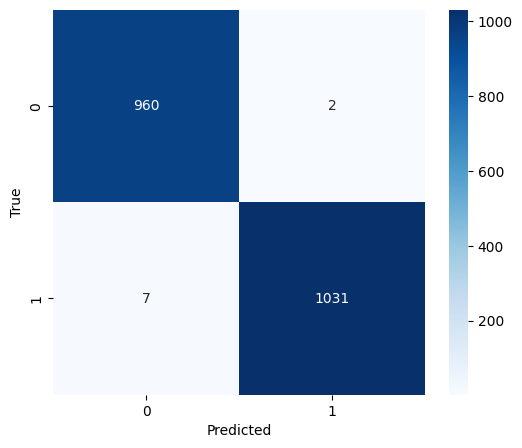

In [37]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix


y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

print(classification_report(y_true, y_pred_classes))

conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

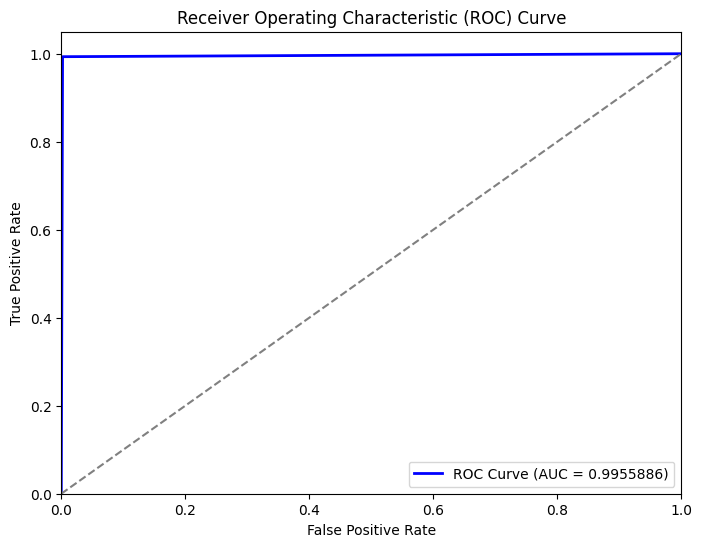

✅ Model AUC Score: 0.9955886


In [38]:
from sklearn.metrics import roc_curve, auc

y_true = y_true
y_scores = y_pred_classes

fpr, tpr, _ = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.7f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
print(f"✅ Model AUC Score: {roc_auc:.7f}")

In [39]:
y_pred_test = model.predict(X_test)


83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step


In [40]:
y_pred_test

array([[1.0000000e+00, 7.2028670e-16],
       [2.2684149e-07, 9.9999976e-01],
       [9.9999380e-01, 6.1487694e-06],
       ...,
       [1.0000000e+00, 1.6174773e-33],
       [1.0000000e+00, 4.1545892e-11],
       [6.2398651e-09, 1.0000000e+00]], dtype=float32)

In [41]:
import pandas as pd

# Assuming X_test is a DataFrame with an 'id' column
# and y_pred_test contains the predicted values

# Create a DataFrame with the required columns
results_df = pd.DataFrame({
    'id': test_df['id'],  # Column 1: IDs from X_test
    'is_tts': y_pred_test[:,1]  # Column 2: Predicted values
})

results_df


,id,is_tts
0,ASM_F_ANGER_00109,7.202867e-16
1,ASM_F_ANGER_00127,9.999998e-01
2,ASM_F_ANGER_00386,6.148769e-06
3,ASM_F_ANGER_00103,9.999996e-01
4,ASM_F_ANGER_00434,3.018276e-17
...,...,...
2630,TAM_F_SURPRISE_00387,1.000000e+00
2631,TAM_F_SURPRISE_00173,1.000000e+00
2632,TAM_F_SURPRISE_00718,1.617477e-33
2633,TAM_F_SURPRISE_00127,4.154589e-11


In [42]:
results_df.to_csv('21F1001107.csv', index=False)

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.config/kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/
